## Single Driver Model

We have the acceleration for a single car from the IDM model as 
<br>
    $\frac{dv}{dt}=a\left[1\:-\:\left(\frac{v}{v_0}\right)^{\delta}\:-\left(\frac{s^{\ast}\left(v,\Delta v\right)}{s}\right)^2\right]$
<br>
where <br> 
$s^{\ast}\left(v,\Delta v\right)=s_0+vT+\frac{v\Delta v}{2\sqrt{ab}}$ <br>
<br>
If we model a single car following a car ahead moving at consant speed $v_{a}$ and starting at position $x_{a0}$, then the car ahead has position $x_a = x_{a0} + v_a t$. We can then compute $\Delta v = v - v_a$ and $s = x_a - L - x$. If $v_a=0$ then the car is stopped.
<br><br>
In python, this math becomes

In [ ]:
from numpy import linspace,array,zeros,log,exp,sin,cos,sqrt,pi

def rate_func( t, V ):
    # RATE_FUNC: IDM Car model
    # Model a car approaching a car ahead moving at constant speed
    global s0, L, T, a_accel, b_decel, delta_exp, v0, x_a0, v_a
    
    # unpack
    x = V[0] # position
    v = V[1] # velocity
    
    # Position of the car ahead
    x_a = x_a0 + v_a * t
    
    # Compute acceleration according to IDM
    s = x_a - L - x # distance to car ahead
    delv = v - v_a  # approach speed to car ahead
        
    star = s0 + T*v + v*delv/(2*sqrt(a_accel*b_decel))
        
    a_idm = a_accel*(1 - (v/v0)**delta_exp - (star/s)**2) # x component of acceleration
          
    # compute derivatives
    dx = v
    dv = a_idm
    
    # pack rate array
    rate = array([dx, dv])
    return rate

Now set the parameters for the IDM model

In [17]:
# set parameters
T = 1.8 #time headway
delta_exp = 4
L = 5
a_accel = 1
b_decel = 4
v0 = 28 #desired speed in m/s
s0 = 2.0 #desired gap m

Set the starting position and speed of the car ahead:

In [26]:
# Starting position and speed of car ahead
x_a0 = 5000. 
v_a = 0 #v0/2 

Set the I.C. and time domain to solve for:

In [27]:
# set initial conditions for the car being modeled
xinit = 0
vinit = 0
# pack i.c.
X0=array([xinit, vinit])

# set the time interval for solving
Tstart=0
Tend =  400 # seconds
time = linspace(Tstart,Tend,100)

Use odeint to solve

In [28]:
from scipy.integrate import odeint
Xout = odeint(rate_func, X0, time, tfirst=True) 

Unpack position and velocity from the output array and plot x and v during the period simulated. The syntax here creates a figure object, fig, and two sub plot objects  dplt, vplt for the distance and velocity plots. These objects are then modified to produce the graphic. 

[Text(0.5, 0, 'Time (sec)'), Text(0, 0.5, 'Velocity (m/s)')]

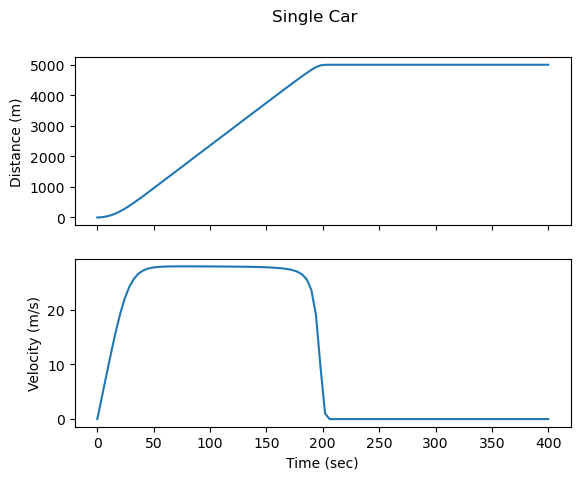

In [ ]:
# unpack
xout=Xout[:,0]
vout=Xout[:,1]

# Plot two figures

import matplotlib.pyplot as plt

# make fig with 2 sub plots, dplt for distance vplt for velocity
fig, [dplt,vplt] = plt.subplots(2) 

fig.suptitle('Single Car')

dplt.plot(time,xout)
dplt.set(ylabel='Distance (m)')
dplt.label_outer()

vplt.plot(time,vout)
vplt.set(xlabel='Time (sec)', ylabel='Velocity (m/s)')